In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid")

### 2. Load Data
---
### Make sure 'train.csv' is in your working directory

In [7]:
df = pd.read_csv("./input/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

C:\Users\rezaf\AppData\Local\Temp\ipykernel_14820\3482533493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


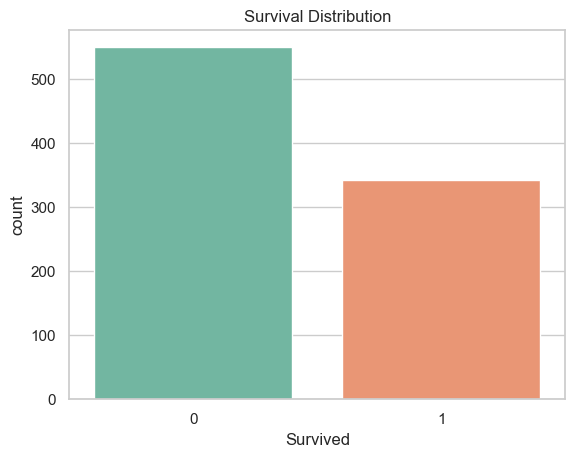

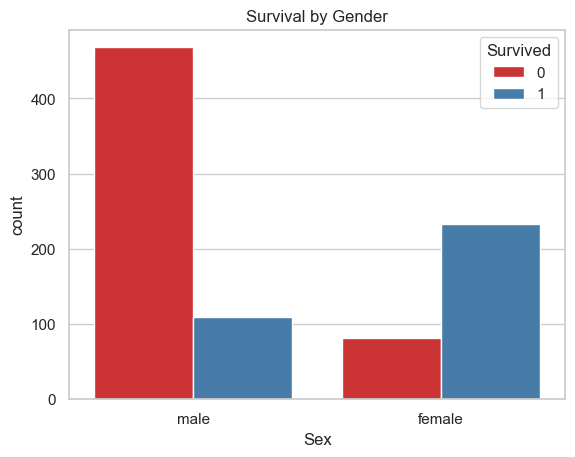

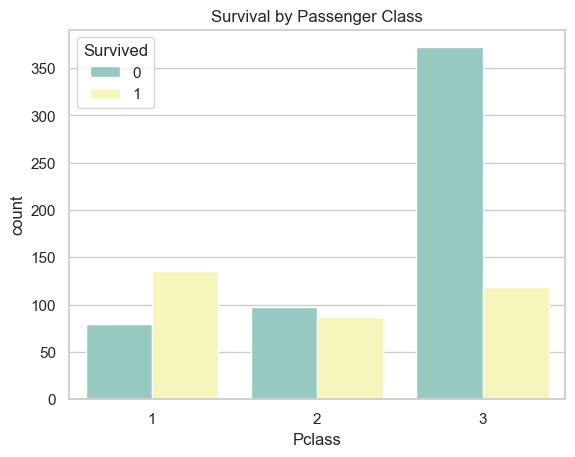

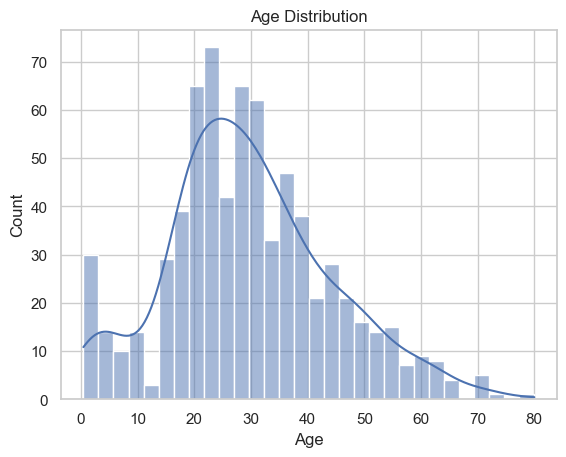

In [8]:
print(df.info())
print(df.describe())
# Survival counts
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival Distribution")
plt.show()

# Gender survival
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender")
plt.show()

# Pclass survival
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set3")
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution
sns.histplot(df["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### 4. Data Preprocessing

In [9]:
# Drop columns not useful for prediction
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# Handle missing values
imputer = SimpleImputer(strategy="median")
df["Age"] = imputer.fit_transform(df[["Age"]])
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode categorical variables
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])  # male=1, female=0
df["Embarked"] = le.fit_transform(df["Embarked"])

# Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Optional: scale features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print (X_train_scaled, X_test_scaled)

[[ 0.82956755  0.74242727 -0.11207776 ... -0.46618317  0.5138115
   0.58489231]
 [-0.37094484  0.74242727 -0.11207776 ... -0.46618317 -0.66256323
   0.58489231]
 [-1.57145722  0.74242727 -0.11207776 ... -0.46618317  3.95539858
   0.58489231]
 ...
 [ 0.82956755 -1.34693328  1.42338169 ...  3.11571343  0.0532047
   0.58489231]
 [-1.57145722  0.74242727  1.34660872 ... -0.46618317  0.13909685
   0.58489231]
 [-1.57145722  0.74242727 -0.11207776 ... -0.46618317 -0.10973011
   0.58489231]] [[ 0.82956755  0.74242727 -0.41916965 ... -0.46618317 -0.15970373
   0.58489231]
 [ 0.82956755  0.74242727  1.1162898  ...  0.72778236 -0.32732356
   0.58489231]
 [ 0.82956755  0.74242727 -0.57271559 ... -0.46618317 -0.51212182
  -1.91626879]
 ...
 [-0.37094484  0.74242727 -0.11207776 ... -0.46618317 -0.44392866
   0.58489231]
 [-0.37094484 -1.34693328 -0.49594262 ... -0.46618317 -0.37538777
  -1.91626879]
 [-0.37094484  0.74242727  0.11824116 ...  0.72778236 -0.11597681
   0.58489231]]


### 5. Model Training

In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6. Model Evaluation

Logistic Regression Accuracy: 0.7988826815642458
Random Forest Accuracy: 0.8268156424581006
Logistic Regression ROC AUC: 0.8519104084321476
Random Forest ROC AUC: 0.827733860342556


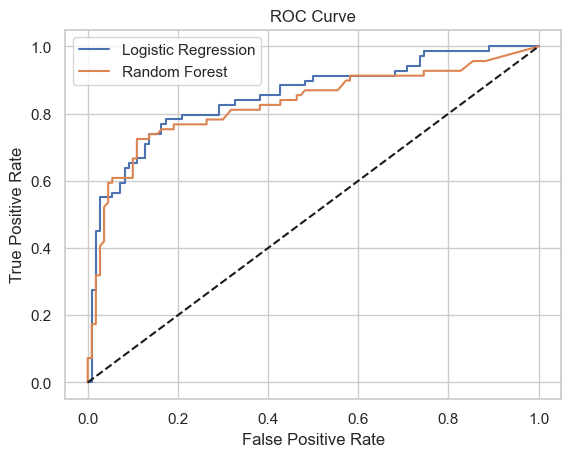

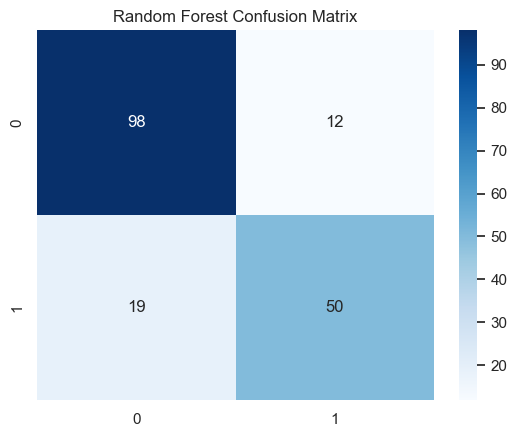

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



In [11]:
# Predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# ROC AUC
y_proba_log = log_reg.predict_proba(X_test_scaled)[:,1]
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba_log))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.plot(fpr_log, tpr_log, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

### 7. Make Predictions on New Data (example with test.csv)

In [ ]:
test_df = pd.read_csv("./input/test.csv")

# Save PassengerId for submission
passenger_ids = test_df["PassengerId"]

# Preprocessing (same as training)
test_df = test_df.drop(columns=["Name", "Ticket", "Cabin"])
test_df["Age"] = imputer.transform(test_df[["Age"]])
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())
test_df["Embarked"] = test_df["Embarked"].fillna("S")

test_df["Sex"] = le.fit_transform(test_df["Sex"])
test_df["Embarked"] = le.fit_transform(test_df["Embarked"])

# Align columns with training set
X_final = test_df.drop("PassengerId", axis=1)

# Predict with Random Forest
predictions = rf.predict(X_final)

# Create submission file
submission = pd.DataFrame({"PassengerId": passenger_ids, "Survived": predictions})
submission.to_csv("./input/submission.csv", index=False)

print("✅ Submission file created: submission.csv")

✅ Submission file created: submission.csv
